In [7]:
import numpy as np
import pandas as pd

In [8]:
csv_file_path = 'General_Population_Data_ACS_2019.csv (2).csv'  
population_data_df = pd.read_csv(csv_file_path, header=1) 

In [9]:
estimate_columns = [col for col in population_data_df.columns if 'Estimate' in col]
population_data_cleaned = population_data_df[['Geographic Area Name'] + estimate_columns].copy()

In [19]:
def generate_synthetic_data_for_year(df, year):
    synthetic_data = df.copy()
    for col in synthetic_data.columns[1:]:  
        synthetic_data[col] = pd.to_numeric(synthetic_data[col], errors='coerce')
        variation = np.random.normal(loc=0, scale=0.05, size=synthetic_data[col].shape)  
        synthetic_data[col] = (synthetic_data[col] * (1 + variation)).round(2)  
    synthetic_data['Year'] = year
    return synthetic_data




In [20]:
for df in yearly_datasets:
    year = df['Year'].iloc[0]
    file_path = f"population_data_corrected_{year}.csv"  
    df.to_csv(file_path, index=False)
    print(f"Generated file for {year}: {file_path}")

Generated file for 2012: population_data_corrected_2012.csv
Generated file for 2013: population_data_corrected_2013.csv
Generated file for 2014: population_data_corrected_2014.csv
Generated file for 2015: population_data_corrected_2015.csv
Generated file for 2016: population_data_corrected_2016.csv
Generated file for 2017: population_data_corrected_2017.csv
Generated file for 2018: population_data_corrected_2018.csv
Generated file for 2019: population_data_corrected_2019.csv
Generated file for 2020: population_data_corrected_2020.csv
Generated file for 2021: population_data_corrected_2021.csv
Generated file for 2022: population_data_corrected_2022.csv


In [21]:
years = range(2012, 2023)
yearly_datasets = [generate_synthetic_data_for_year(population_data_cleaned, year) for year in years]


In [22]:
for df in yearly_datasets:
    year = df['Year'].iloc[0]
    file_path = f"population_data_corrected_{year}.csv" 
    df.to_csv(file_path, index=False)
    print(f"Generated file for {year}: {file_path}")

Generated file for 2012: population_data_corrected_2012.csv
Generated file for 2013: population_data_corrected_2013.csv
Generated file for 2014: population_data_corrected_2014.csv
Generated file for 2015: population_data_corrected_2015.csv
Generated file for 2016: population_data_corrected_2016.csv
Generated file for 2017: population_data_corrected_2017.csv
Generated file for 2018: population_data_corrected_2018.csv
Generated file for 2019: population_data_corrected_2019.csv
Generated file for 2020: population_data_corrected_2020.csv
Generated file for 2021: population_data_corrected_2021.csv
Generated file for 2022: population_data_corrected_2022.csv


## EXPLORATORY DATA ANALYSIS 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [38]:
def clean_column_names(columns):
    cleaned_columns = []
    for col in columns:
        parts = col.split('!!')
        if len(parts) >= 2:
            cleaned_columns.append(f"{parts[-2]} {parts[-1]}".strip())
        else:
            cleaned_columns.append(col.strip())
    return cleaned_columns

In [39]:
file_paths = [
    'population_data_corrected_2012.csv',
    'population_data_corrected_2013.csv',
    'population_data_corrected_2014.csv',
    'population_data_corrected_2015.csv',
    'population_data_corrected_2016.csv',
    'population_data_corrected_2017.csv',
    'population_data_corrected_2018.csv',
    'population_data_corrected_2019.csv',  # Real data
    'population_data_corrected_2020.csv',
    'population_data_corrected_2021.csv',
    'population_data_corrected_2022.csv'
]

In [40]:
for file in file_paths:
    df = pd.read_csv(file)
    
   
    df.columns = clean_column_names(df.columns)
    
   
    cleaned_file_path = file.replace('corrected', 'cleaned')
    df.to_csv(cleaned_file_path, index=False)
    print(f"Cleaned file saved to {cleaned_file_path}")

Cleaned file saved to population_data_cleaned_2012.csv
Cleaned file saved to population_data_cleaned_2013.csv
Cleaned file saved to population_data_cleaned_2014.csv
Cleaned file saved to population_data_cleaned_2015.csv
Cleaned file saved to population_data_cleaned_2016.csv
Cleaned file saved to population_data_cleaned_2017.csv
Cleaned file saved to population_data_cleaned_2018.csv
Cleaned file saved to population_data_cleaned_2019.csv
Cleaned file saved to population_data_cleaned_2020.csv
Cleaned file saved to population_data_cleaned_2021.csv
Cleaned file saved to population_data_cleaned_2022.csv


In [41]:
cleaned_file_paths = [file.replace('corrected', 'cleaned') for file in file_paths]
dfs = [pd.read_csv(file) for file in cleaned_file_paths]
combined_df = pd.concat(dfs)

In [42]:
print("Checking missing values:")
print(combined_df.isnull().sum())
print("\nGeneral data information:")
print(combined_df.info())

Checking missing values:
Geographic Area Name                                              0
SEX AND AGE Total population                                      0
Total population Male                                             0
Total population Female                                           0
Total population Sex ratio (males per 100 females)                0
                                                                 ..
Estimate Total housing units                                      0
CITIZEN, VOTING AGE POPULATION Citizen, 18 and over population    0
Citizen, 18 and over population Male                              0
Citizen, 18 and over population Female                            0
Year                                                              0
Length: 91, dtype: int64

General data information:
<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 13
Data columns (total 91 columns):
 #   Column                                                                 

In [70]:

df = pd.read_csv('population_data_cleaned_2019.csv')
for col in df.columns:
    print(col)

Geographic Area Name
SEX AND AGE Total population
Total population Male
Total population Female
Total population Sex ratio (males per 100 females)
Total population Under 5 years
Total population 5 to 9 years
Total population 10 to 14 years
Total population 15 to 19 years
Total population 20 to 24 years
Total population 25 to 34 years
Total population 35 to 44 years
Total population 45 to 54 years
Total population 55 to 59 years
Total population 60 to 64 years
Total population 65 to 74 years
Total population 75 to 84 years
Total population 85 years and over
Total population Median age (years)
Total population Under 18 years
Total population 16 years and over
Total population 18 years and over
Total population 21 years and over
Total population 62 years and over
Total population 65 years and over
Total population 18 years and over.1
18 years and over Male
18 years and over Female
18 years and over Sex ratio (males per 100 females)
Total population 65 years and over.1
65 years and over Ma

In [43]:
for col in combined_df.columns[1:]:  # Skip the 'Community' column
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

In [44]:
print("\nDescriptive statistics:")
print(combined_df.describe())


Descriptive statistics:
       SEX AND AGE Total population  Total population Male  \
count                  1.540000e+02           1.540000e+02   
mean                   4.676266e+05           2.398404e+05   
std                    9.967076e+05           5.113131e+05   
min                    2.409640e+03           1.272020e+03   
25%                    7.019102e+03           3.683500e+03   
50%                    2.206690e+04           1.201776e+04   
75%                    4.823727e+04           2.848460e+04   
max                    3.452777e+06           1.838968e+06   

       Total population Female  \
count             1.540000e+02   
mean              2.350390e+05   
std               5.033207e+05   
min               1.289890e+03   
25%               3.292650e+03   
50%               9.324505e+03   
75%               2.434459e+04   
max               1.795937e+06   

       Total population Sex ratio (males per 100 females)  \
count                                         15

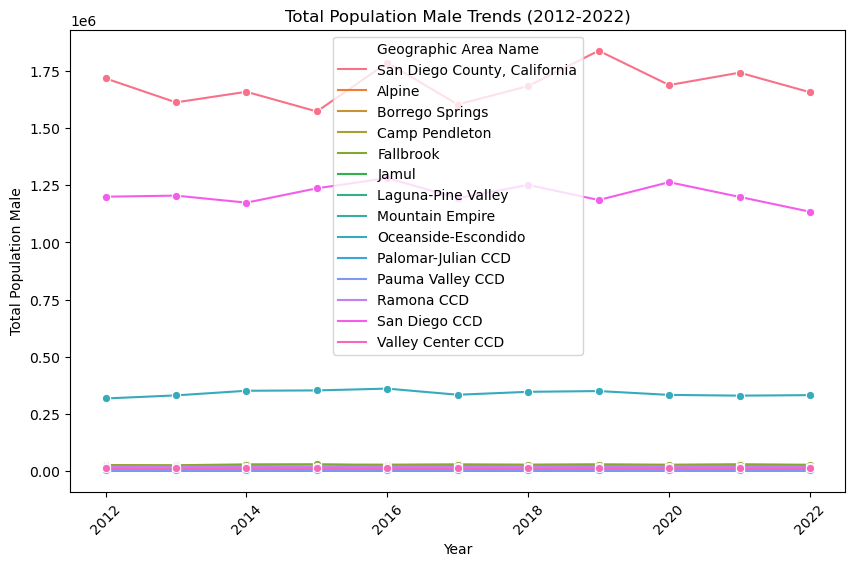

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Year', y='Total population Male', hue='Geographic Area Name', marker='o')
plt.title('Total Population Male Trends (2012-2022)')
plt.ylabel('Total Population Male')
plt.xticks(rotation=45)
plt.show()

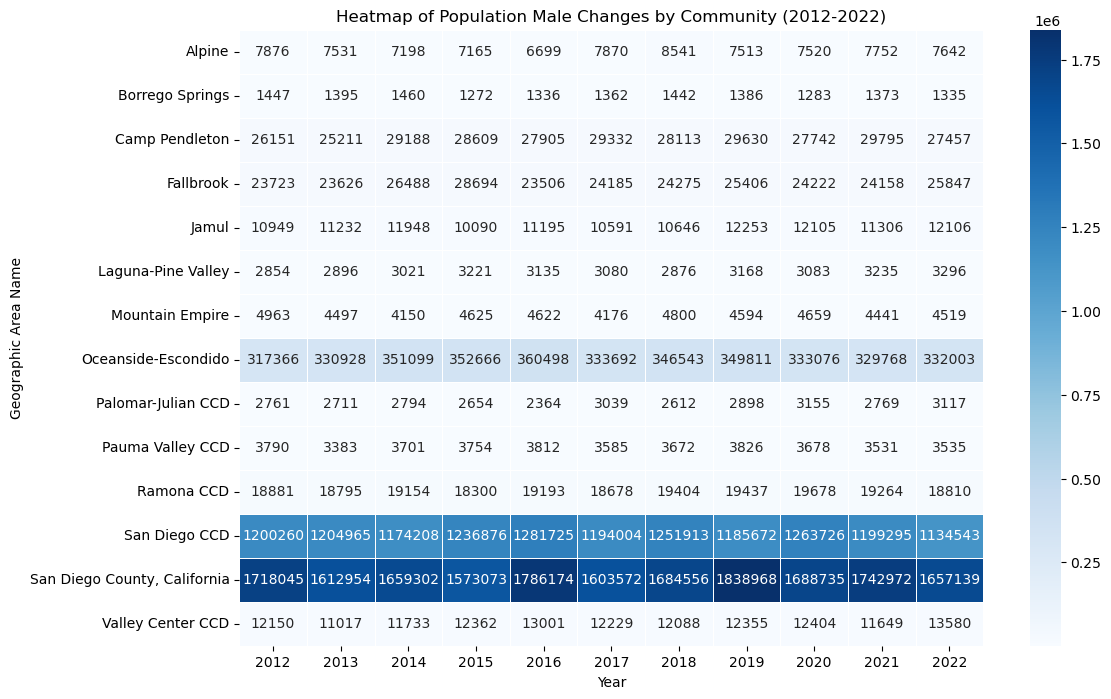

In [49]:
pivot_df = combined_df.pivot_table(index='Geographic Area Name', columns='Year', values='Total population Male', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap="Blues", annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Population Male Changes by Community (2012-2022)')
plt.ylabel('Geographic Area Name')
plt.show()

In [53]:
geographic_areas = [
    'Alpine', 'Borrego Springs', 'Camp Pendleton', 'Fallbrook', 'Jamul',
    'Laguna-Pine Valley', 'Mountain Empire', 'Oceanside-Escondido',
    'Palomar-Julian CCD', 'Pauma Valley CCD', 'Ramona CCD', 'San Diego CCD',
    'Valley Center CCD'
]

In [54]:
dfs = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dfs)


In [56]:
filtered_df = combined_df[combined_df['Geographic Area Name'].isin(geographic_areas)]

In [67]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

<Figure size 1400x800 with 0 Axes>